## 12.12

In [22]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw 
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
print(rdkit.__version__)

2024.03.6


In [42]:
#part1:Different Line Notations
#SMILES examples
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
caffeine_smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
paracetamol_smiles = "CC(=O)NC1=CC=C(O)C=C1"
benzene_smiles="C1CCCCC1"

In [43]:
#Convert SMILES to melcules
aspirin_mol=Chem.MolFromSmiles(aspirin_smiles)
caffeine_mol=Chem.MolFromSmiles(caffeine_smiles)
paracetamol_mol=Chem.MolFromSmiles(paracetamol_smiles)
benzene_mol=Chem.MolFromSmiles(benzene_smiles)

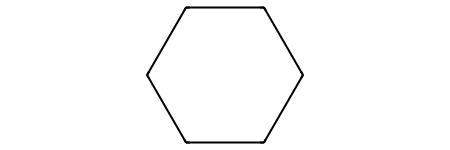

In [ ]:
paracetamol_mol

In [54]:
# Part 2: Visualizing Molecules
# Create a list of molecules and their names
mols = [aspirin_mol, caffeine_mol, paracetamol_mol]
legends = ['Aspirin', 'Caffeine', 'Paracetamol']


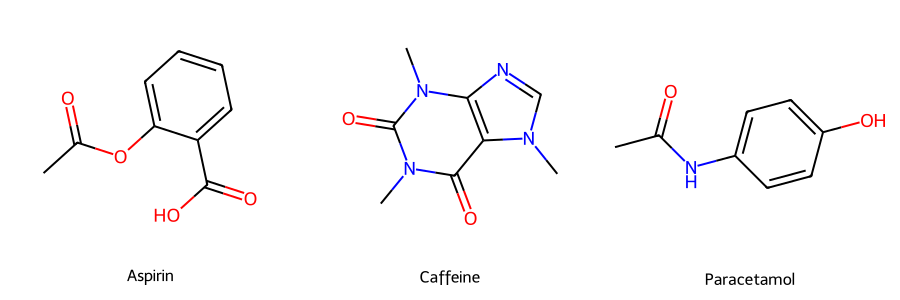

In [46]:
# Draw molecules in a grid
img = Draw.MolsToGridImage(mols, legends=legends, molsPerRow=3, 
                          subImgSize=(300,300), returnPNG=False)
img

In [47]:
#Part 3
def calculate_properties(mol):
    """
    Calculates basic molecular properties and descriptors for a given molecule.
    
    Computes a set of commonly used molecular descriptors that are relevant for 
    drug discovery and chemical analysis:
    - Molecular Weight: Exact molecular weight in daltons
    - LogP: Octanol-water partition coefficient (lipophilicity measure)
    - H-Bond Donors: Number of hydrogen bond donors (OH and NH groups)
    - H-Bond Acceptors: Number of hydrogen bond acceptors (O and N atoms)
    - Rotatable Bonds: Number of rotatable bonds (flexibility measure)
    - Ring Count: Number of rings in the molecule
    - TPSA: Topological Polar Surface Area (membrane permeability indicator)
    
    Parameters
    ----------
    mol : rdkit.Chem.rdchem.Mol
        RDKit molecule object to analyze
        
    Returns
    -------
    dict
        Dictionary containing calculated properties:
        - Molecular Weight: float
        - LogP: float
        - H-Bond Donors: int
        - H-Bond Acceptors: int
        - Rotatable Bonds: int
        - Ring Count: int
        - TPSA: float (in Å²)
    
    Examples
    --------
    >>> from rdkit import Chem
    >>> aspirin = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
    >>> calculate_properties(aspirin)
    {'Molecular Weight': 180.157, 'LogP': 1.31, 'H-Bond Donors': 1,
     'H-Bond Acceptors': 4, 'Rotatable Bonds': 3, 'Ring Count': 1,
     'TPSA': 63.6}
    """
    return {
        'Molecular Weight': Descriptors.ExactMolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'H-Bond Donors': Descriptors.NumHDonors(mol),
        'H-Bond Acceptors': Descriptors.NumHAcceptors(mol),
        'Rotatable Bonds': Descriptors.NumRotatableBonds(mol),
        'Ring Count': Descriptors.RingCount(mol),
        'TPSA': Descriptors.TPSA(mol)
    }

In [48]:
# Calculate properties for each molecule
properties_list = []
for mol, name in zip(mols, legends):
    props = calculate_properties(mol)
    props['Name'] = name
    properties_list.append(props)



In [55]:
# Convert to DataFrame
df = pd.DataFrame(properties_list)
df = df.set_index('Name')
df

,Molecular Weight,LogP,H-Bond Donors,H-Bond Acceptors,Rotatable Bonds,Ring Count,TPSA
Name,,,,,,,
Aspirin,180.042259,1.3101,1,3,2,1,63.60
Caffeine,194.080376,-1.0293,0,6,0,2,61.82
Paracetamol,151.063329,1.3506,2,2,1,1,49.33
